## Environment setup

Create a new anaconda environment and call it 'machinelearning'

- conda create --name machinelearning python=3.11

Install the following packages after activating the environment

- conda install ipykernel numpy pandas
- conda install anaconda::matplotlib
- conda install anaconda::seaborn
- conda install anaconda::scikit-learn

## Goals
In this lab you will:
- Learn to implement the a linear model $f_{w,b}(x)$ to be used for linear regression with one variable



## Notation

With $f_{w,b}(x)$ as a linear model of one variable, we exlicitly imply that 

$$f_{w,b}(x) = w \cdot x+b$$

The goal is to find values for $w$ and $b$ so that the model $f_{w,b}(x)$ best fits the data we train it on.

The feature and target of the $i$:th training sample will be denoted $x^{(i)}$ and $y^{(i)}$, respectively. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#create data
x = np.array([1, 1.2, 2, 3, 4.5, 4, 5, 6, 7, 7.5, 8, 9])
y = np.array([13, 14, 17, 12, 23, 24, 25, 25, 24, 28, 32, 33])

Our data now looks like this

| x (number of rooms)  | y (price in thousands of $) |
| -------------------  | ------------------------ |
| 1                  | 13                      |
| 1.2                | 14                      |
| 2                  | 17                      |
| 3                  | 12                      |
| ...                | ...                     |
| 9                  | 33                      |

The x's are our features, and the y's our targets

Our task is now to fit a linear model $f_{w,b}(x) = w \cdot x+b$ to this data, and use it to predict prices for other houses.

It is very common to call the data you train on `x_train` and `y_train`, so let's create those variables here. We'll also store the data in one-dimensional NumPy arrays, since calculations with those are faster and more convenient than with Python lists.

In [4]:
x_train = np.array(x)
y_train = np.array(y)
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1.  1.2 2.  3.  4.5 4.  5.  6.  7.  7.5 8.  9. ]
y_train = [13 14 17 12 23 24 25 25 24 28 32 33]


### Number of training examples `m`
We will use `m` to denote the number of training examples. 

In [5]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 12


### Training example `x_i, y_i`

You will use $x^{i}$ and $y^{i}$ to denote the $i^{th}$ training example.

To access any particular training sample, we can simply index our training data.

Execude the next code block below to get the $i^{th}$ training example.

In [6]:
i = 11 # Change this to the desired number i-1 to see (x^i, y^i)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i+1}), y^({i+1})) = ({x_i}, {y_i})")

(x^(12), y^(12)) = (9.0, 33)


### Plotting the data

Let's plot our training data to get some intuition and better understanding of it. We can use a simply `scatter()`-plot here.


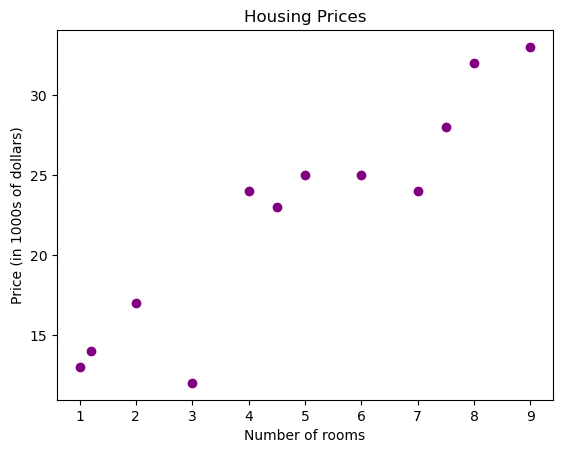

In [7]:
# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='purple')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Number of rooms')
plt.show()

## Model function

As described in the lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x) = w \cdot x + b$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

**Now:** Let's first create a function that, given any value of x, w and b, returns the corresponding function value y

In [8]:
# we'll create a general function that can take any values of w and b, so that it can be reused later

def linear_model(x, w, b):

    predicted_y = w*x + b
    
    return predicted_y

## Testing different values of w and b


Let's try to get a better intuition for linear modelling by testing out different values of $w$ and $b$, to see which one fits the data best 

Let's begin by testing $w = 1$ and $b = 10$.

In other words, our hypothesis model using these values is

$$ f_{1,10}(x) = 1 \cdot x + 10$$

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [12]:
w = 2
b = 13
print(f"w: {w}")
print(f"b: {b}")

w: 2
b: 13


Now, let's assume that we have no idea what the real y-values (house prices) in our training data, and let's just use the features in our training data to predict housing prices instead. 

In [13]:
y_predictions = [linear_model(x,w,b) for x in x_train]

What we have done is to calculate $\hat{y}^{i} = f_{1,10}(x^{i})$ for all of feature values $x^{i}$ in the training data. 

Our hope is that each $\hat{y}^i$ is close to the true $y^{i}$.

## Plotting the results

Let's plot these predicted results, together with the original data, to see what we've actually done

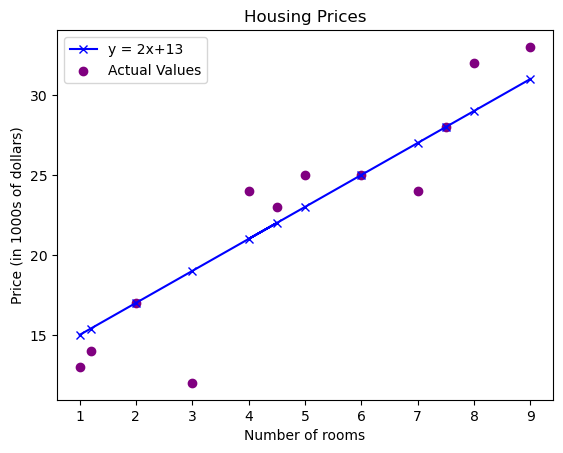

In [14]:
# Plot our model prediction
plt.plot(x_train, y_predictions, marker='x', c='b',label=f'y = {w}x+{b} ')

# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='purple',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Number of rooms')
plt.legend()
plt.show()

As you can see, setting $w = 1$ and $b = 10$ does *not* result in a linear model that fits our data particularly well. 

## Challenges 

**Task 1**

Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

**Ans:** $w=2$ and $b=13$ seem to be good values for our function.

**Task 2**

Prediction

Now that we have a good model, we can use it to make an original prediction. Predict the price of a house with: 
- 7.5 bedrooms
- 10 bedrooms

Are you interpolating, or extrapolating, in each of those cases?

*Hint: look up the definitions of interpolation and extrapolation if you're not sure what they mean.*

In [15]:
print(f"x=7.5 -> {linear_model(7.5, w, b)}")
print(f"x=10 -> {linear_model(10, w, b)}")

x=7.5 -> 28.0
x=10 -> 33


**Task 3**

Create your own data, and try to fit a linear model (find values of w and b) on that data

In [16]:
x_train = np.array([1, 2, 3, 3.5, 3.7, 4, 4.4, 5])
y_train = np.array([4, 5, 8, 7, 9, 11, 13, 17])

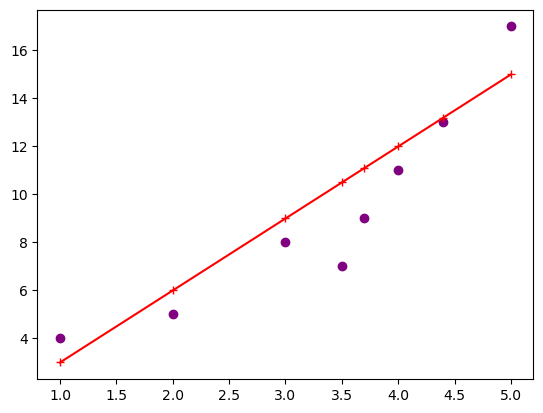

In [24]:
# Actual data
plt.scatter(x_train, y_train, c="purple")

# Approximated data
w = 3
b = 0
plt.plot(x_train, linear_model(x_train, w, b), c="red", marker="+")

plt.show()

# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was number of houses and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.